## Imports 

In [1]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
pd.set_option('display.max_columns', None)
sns.set_theme()
sns.set(rc={'figure.figsize': (20, 10)})  # width, height

## Loading data 

### Credentials and query 

In [552]:
# acessing bigquery redentials from local file 
credentials, project_id = load_credentials_from_file('service_account.json')

In [553]:
# Load data from BigQuery
client = Client(
    project = project_id,
    credentials=credentials
)

In [554]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [5]:
# creating a data loading function 
def load_data(table): 
    # selecting table
    query = f"SELECT * FROM `da26-python.music_data.{table}`" 
    # creating query job and transforming to dataframe  
    load_job = client.query(query)
    data = load_job.to_dataframe() 
    # return dataframe 
    return data

### Load tables

In [6]:
artists = load_data('artists')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [7]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


In [8]:
audio_features = load_data('audio_features')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [9]:
audio_features.sample(5)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
9655,2tUBqZG2AbRi7Q0BIrVrEj,0.709,0.824,1.0,-8.824,1.0,0.0453,0.2070,0.000307,0.0888,0.867,118.818,4.0
1432,2CVJECHIdpe8otFH0XFI4F,0.529,0.811,5.0,-5.620,1.0,0.0511,0.0317,0.000000,0.3110,0.454,102.703,4.0
1922,55h7vJchibLdUkxdlX3fK7,0.874,0.692,5.0,-5.280,0.0,0.0431,0.0412,0.000072,0.3240,0.937,116.017,4.0
7800,6ZZZBAcwGNwUUb2XPVXHLK,0.585,0.570,2.0,-10.256,1.0,0.0266,0.0213,0.000000,0.1590,0.604,103.012,4.0
6523,5CscrLqFBgPfZR8fGtikov,0.550,0.409,7.0,-7.718,1.0,0.0316,0.3860,0.000000,0.1220,0.252,133.099,4.0


In [10]:
chart_positions = load_data('chart_positions')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [12]:
tracks = load_data('tracks')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [13]:
tracks.head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
1,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False
2,1dtIaSlyrLI04sqYa8nLyN,Rudolph the Red-Nosed Reindeer,186733,1947,album,False
3,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False


In [14]:
tracks_artists_mapping = load_data('tracks_artists_mapping')

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [15]:
tracks_artists_mapping.head()

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv


## Inital inspection 

In [16]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


### Artists 

In [17]:
# inital inspection
artists.sample(10)

,artist_id,name,popularity,followers
375,72ktMty33X1LsIzHdRr0U5,Tom Scott,34,33101
1856,4NgNsOXSwIzXlUIJcpnNUp,Sarah McLachlan,63,900323
3003,0Y6dVaC9DZtPNH4591M42W,TV Girl,84,8098038
2096,4A6cd63FWHbCLqk9mtGUZZ,Booboo Stewart,66,62532
2876,3qsKSpcV3ncke3hw52JSMB,Young Miko,80,3498842
1014,3tCxM1rTj2qUXsiQZxvt2I,Nappy Roots,51,234088
1031,0lax1ZgWclW6mZFaGu27MM,Cupid,51,44059
2505,6DIS6PRrLS3wbnZsf7vYic,WALK THE MOON,72,2133015
2317,4dwdTW1Lfiq0cM8nBAqIIz,Of Monsters and Men,69,3526061
2284,2cBh5lVMg222FFuRU7EfDE,Sophie Ellis-Bextor,69,520388


In [18]:
# checking dtypes, number of rows and number of null values 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


In [19]:
# checking for duplicated rows 
artists.duplicated().sum()

0

In [20]:
# checking number of unique values 
artists['name'].nunique()

3101

In [21]:
# checking max value in popularity
artists['popularity'].max()

100

In [22]:
# checking min value in popularity
artists['popularity'].min()

0

In [23]:
# checking max value in followers
artists['followers'].max()

123544806

In [24]:
# checking min value in followers
artists['followers'].min()

5

In [25]:
artists.head(10)

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450
5,0sghswo09Y90G2q0eha4SW,Joe Osborne,0,23
6,14qvHyl1HApvsMrtxXljMM,Archuleta Maroon,0,21
7,1b9wvEcR1vuxoVu6isElSd,Anand Clique,0,109
8,5lfsewMdyn5f9okNcLUtYM,Xander Phillips,0,79
9,0o9FGMZT1bOTSGYFb7BoWz,Drop That Thun Thun,0,250


In [26]:
artists.tail(10)

,artist_id,name,popularity,followers
3098,7dGJo4pcD2V6oG8kP0tJRR,Eminem,93,91487128
3099,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,93,16616208
3100,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,94,60197201
3101,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,33611357
3102,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,86231149
3103,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95,13599895
3104,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96,92598894
3105,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96,100687015
3106,3TVXtAsR1Inumwj472S9r4,Drake,96,92537455
3107,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,123544806


### Audio features

In [27]:
# inital inspection 
audio_features.sample(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
432,2oyJMZrw1DGvvkT2NbCZ0Y,0.485,0.701,8.0,-3.807,1.0,0.0288,0.0390,0.000000,0.0977,0.613,151.948,4.0
10409,5QemHQxj7PRkrw8lJl2W7C,0.780,0.720,11.0,-5.914,0.0,0.0278,0.2800,0.591000,0.1320,0.583,108.685,4.0
5847,1fidCEsYlaVE3pHwKCvpFZ,0.729,0.675,8.0,-6.003,1.0,0.0312,0.1750,0.000002,0.5500,0.779,119.968,4.0
5749,6ZRuF2n1CQxyxxAAWsKJOy,0.610,0.725,8.0,-5.131,1.0,0.1500,0.3670,0.000000,0.1540,0.291,146.163,4.0
5370,5oO3drDxtziYU2H1X23ZIp,0.509,0.637,4.0,-4.830,0.0,0.0470,0.0717,0.000011,0.0789,0.379,172.007,3.0
7134,1zU8j1x3yi9xalMF96pzKp,0.379,0.468,4.0,-5.070,1.0,0.0298,0.0327,0.000000,0.1580,0.115,119.447,3.0
9791,7iQMm50NNwlUIRWhONZR2k,0.572,0.722,6.0,-5.818,1.0,0.0363,0.5120,0.000001,0.1240,0.636,171.857,4.0
9471,0nprj2O0teCglthuhzTG5o,0.596,0.921,7.0,-4.987,1.0,0.0504,0.0221,0.000000,0.3030,0.703,104.024,4.0
9166,5lKFO0PrOC9jmOlPEdjHsL,0.745,0.513,1.0,-9.116,1.0,0.0870,0.7830,0.000000,0.2160,0.929,109.935,3.0
8416,2l1fWY1albInvAG9t8WP2p,0.543,0.589,4.0,-9.496,1.0,0.0421,0.0236,0.000030,0.0798,0.255,129.813,4.0


In [28]:
# checking dtypes, number of rows and number of null values 
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [29]:
# looking for duplicates 
audio_features.duplicated().sum()

6

In [30]:
# inspecting duplicates 
audio_features[audio_features.duplicated() == True]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# looking for outliers by checking the mean, minimal and max value for each column
audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000,10776.000000
mean,0.641901,0.663968,5.190423,-6.258711,0.647921,0.114843,0.186692,0.020238,0.182950,0.495219,122.563080,3.960375
std,0.150577,0.173540,3.609825,2.467240,0.477641,0.113855,0.227321,0.115044,0.138954,0.225929,29.702706,0.313069
min,0.000000,0.003430,0.000000,-33.833000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540000,0.552000,2.000000,-7.421250,0.000000,0.036900,0.021475,0.000000,0.097200,0.316000,97.925750,4.000000
50%,0.647000,0.679000,5.000000,-5.843500,1.000000,0.059700,0.088300,0.000000,0.127500,0.491000,121.991500,4.000000
75%,0.752000,0.798000,8.000000,-4.619000,1.000000,0.155000,0.266250,0.000023,0.229000,0.669000,143.187250,4.000000
max,0.980000,0.999000,11.000000,0.175000,1.000000,0.951000,0.995000,0.985000,0.992000,0.976000,213.737000,5.000000


### Chart positions

In [32]:
# inital inspection
chart_positions.sample(10)

,chart_week,list_position,track_id
17046,2020-04-25,52,0xKBkLcF71uUQeTA7FSu4A
73539,2003-02-22,2,4RY96Asd9IefaL3X4LOLZ8
10685,2023-07-08,72,0cNSq9T5l8gZnpY14rsTR2
15424,2021-06-26,78,0rOVgtieEk5SoypbulRiKI
27360,2021-04-17,42,1diS6nkxMQc3wwC4G1j0bh
32505,2014-03-22,26,1xMLthTaWJieT9YGV1hyS5
26417,2000-05-06,22,1ZozJfi8u9cO2Ob8KwiwNT
4766,2015-09-26,73,0H04yVa3DJxoXbLBpAb7iV
32802,2006-01-28,26,1yKu2MhpwzDXXH2tzG6xoa
53880,2022-07-30,10,3F5CgOj3wFlRv51JsHbxhe


In [33]:
# checking dtypes, number of rows and number of null values 
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [34]:
# looking for dublidated rows
chart_positions.duplicated().sum()

0

In [35]:
# looking for outlisers in list position by checking max and min value
chart_positions['list_position'].describe()

count     129305.0
mean     50.498558
std      28.866804
min            1.0
25%           26.0
50%           50.0
75%           76.0
max          100.0
Name: list_position, dtype: Float64

### Tracks

In [36]:
# inital inspection 
tracks.sample(10)

,track_id,name,duration_ms,release_date,album_type,explicit
1874,4j9Y9TzpmUE21e91R5DT7k,Change Me,230386,2006-10-14,album,False
3514,2atYprr9JsQaLynGhrWhld,Heartbeat,220693,2012-02-07,album,False
5355,4P9Q0GojKVXpRTJCaL3kyy,All Of The Girls You Loved Before,221407,2019-08-23,single,False
1261,46l7fOJggsNqrNPJeFk0og,Pon De River Pon De Bank,239786,2003-12-02,album,False
10882,4JQIGTLXz4oULctglUDpw6,Sensational (feat. Davido & Lojay),231109,2024-04-11,album,True
1934,08mW3TDbM23kCPQ7PT9J39,Love You - Live,163733,2007-01-01,album,False
8485,0CokSRCu5hZgPxcZBaEzVE,Glorious (feat. Skylar Grey),220454,2017-09-22,album,True
5123,4j3GWI86JvSaF0BLdmgcfF,Summertime Magic,213600,2018-07-11,single,False
3411,4xpY2faFPJA2YQE4P9S78U,You Can't Stop The Beat,223013,2011-12-06,album,False
7991,5hgnY0mVcVetszbb85qeDg,Partition,319466,2014-11-24,album,True


In [37]:
# checking dtypes, number of rows and number of null values 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [38]:
# looking for duplicates
tracks.duplicated().sum()

287

In [39]:
# checking duplicates
tracks[tracks.duplicated()==True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [40]:
# looking for outliers by checking the minimal value
tracks['duration_ms'].min()

7500

In [41]:
# looking for outliers by checking the max value
tracks['duration_ms'].max()

1037906

In [42]:
# looking for outliers by checking the minimal value
tracks['release_date'].sample(10)

6755    2024-07-04
791     2001-06-01
6855          1999
927     2002-01-01
201           2006
2946    2010-09-13
4757    2016-11-25
6539    2023-10-26
4012    2014-01-01
7483    2008-06-17
Name: release_date, dtype: object

In [43]:
# exploring row 256 further to get song name 
tracks.loc[256]

track_id        2HTRbbAy1RHTsRbJ0RNcjM
name                    Love Remembers
duration_ms                     235773
release_date                      2008
album_type                       album
explicit                         False
Name: 256, dtype: object

In [44]:
# getting artist_id by matching on track_id 
tracks_artists_mapping[tracks_artists_mapping['track_id'] == '4cJCNgN7nEF6Y560qcAAaQ']

,artist_id,track_id
618,0EhgpjUqiIIQhM6ZRF4kXX,4cJCNgN7nEF6Y560qcAAaQ


In [45]:
# getting artist name by matching on artist_id 
artists[artists['artist_id'] == '0EhgpjUqiIIQhM6ZRF4kXX']

,artist_id,name,popularity,followers
783,0EhgpjUqiIIQhM6ZRF4kXX,Pat Green,47,151080


In [46]:
# Trying to find a complete release date on Spotify for "Let Me" by "Pat Green"
# Assuming no more data is available since Spotify only has 2009 as release date

In [47]:
# finding all dates that do not follow YYYY-MM-DD format and adding to list for inspection
bad_dates = tracks[pd.to_datetime(tracks['release_date'], format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [48]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [49]:
# checking values in album_type and counting each  
tracks['album_type'].value_counts()

album_type
album          8977
single         1671
compilation     422
Name: count, dtype: int64

In [50]:
# checking values in explicit and counting each 
tracks['explicit'].value_counts()

explicit
False    6850
True     4220
Name: count, dtype: Int64

### Tracks artists mapping

In [51]:
# inital isnpection
tracks_artists_mapping.sample(10)

,artist_id,track_id
4358,20sxb77xiYeusSH8cVdatc,32UIpKdyGzgTPTO8e5ge5c
5138,2RTUTCvo6onsAnheUk3aL9,7fKsaiVDwKe6VVsiGk48YG
3748,1d6dwipPrsFSJVmFTTdFSS,4oCqda0opcaXQPjoAhhcfg
8102,43sZBwHjahUvgbx1WNIkIz,25TQBBKOrtTfnH6QBM9He1
4293,1zNqQNIdeOUZHb8zbZRFMX,1oUudyBYVGMIC8JXeIsFzq
10189,55Aa2cqylxrFIXC767Z865,7KcGEssn7BnJdTgildK5y0
5267,2YZyLoL8N0Wb9xBt1NhZWg,0zO8ctW0UiuOefR87OeJOZ
13452,6veh5zbFpm31XsPdjBgPER,67G6iaOw8DZqp1z8STR89R
14648,7o9Nl7K1Al6NNAHX6jn6iG,3Ju48PMNQkAGxjJCbWcfeM
1005,0SCbttzoZTnLFebDYmAWCm,07DXC9tg5mySIQfRoVHYmI


In [52]:
# checking dtypes, number of rows and number of null values 
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  15048 non-null  object
 1   track_id   15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [53]:
# looking for duplicates
tracks_artists_mapping.duplicated().sum()

0

## Data cleaning 

### Deleting duplicates in audio features

In [54]:
# saving duplicates to list  
duplicates_list = audio_features.loc[audio_features.duplicated()].index

In [55]:
# dropping duplicates 
audio_features.drop(duplicates_list, inplace=True)

# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [56]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777 entries, 0 to 10776
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [57]:
# looking for last row containing null values  
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
2,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
3,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
4,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0


In [58]:
# dropping row 0 
audio_features.drop(0, inplace=True)

In [59]:
# resetting the index 
audio_features.reset_index(drop= True, inplace= True)

In [60]:
# sanitycheck 
audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3lZpvPprN56RWqDqrKy9vl,0.000,0.532,3.0,-7.447,1.0,0.0000,0.976,0.000000,0.0000,0.0000,0.000,0.0
1,7rLDARtJALM7QdiJDMXW7m,0.250,0.215,8.0,-13.676,0.0,0.0370,0.632,0.071700,0.4010,0.0746,174.824,3.0
2,4TbNLKRLKlxZDlS0pu7Lsy,0.250,0.136,10.0,-12.162,1.0,0.0370,0.673,0.000157,0.1070,0.0981,118.086,4.0
3,6LtHYDgYHRCHoKK3snfr2w,0.375,0.133,0.0,-10.624,0.0,0.0352,0.651,0.000000,0.0695,0.1920,131.721,4.0
4,60RFlt48hm0l4Fu0JoccOl,0.375,0.428,0.0,-7.387,1.0,0.0290,0.109,0.000000,0.1050,0.3610,78.516,4.0


### Deleting duplicates in tracks 

In [61]:
# inspecting duplicated rows 
tracks[tracks.duplicated() == True]

,track_id,name,duration_ms,release_date,album_type,explicit
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
13,4S1VYqwfkLit9mKVY3MXoo,Forever Young,226706,1984,album,False
25,7MQywXGHEev7JmwwIzMcao,Love Like This,275706,1998,album,False
63,1uPrIHgYztXSkkcts9jet8,She Bangs - English Version,280626,2000,album,False
...,...,...,...,...,...,...
11002,0QpiyJbgWUjyAQNqjIA5tO,Hate Me,161142,2024-07-26,single,True
11024,1qIwin7JMVuX70qN6wD8ww,It's Up (feat. Young Thug & 21 Savage),278000,2024-08-30,single,True
11029,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True
11030,1eroCliWpJrEu1V7VSObcO,Circadian Rhythm,126356,2024-08-30,single,True


In [62]:
# saving duplicates to list  
duplicates_list = tracks.loc[tracks.duplicated()].index

In [63]:
# dropping duplicates 
tracks.drop(duplicates_list, inplace=True)

# resetting the index 
tracks.reset_index(drop= True, inplace= True)

In [64]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


### Converting string to datetime

In [65]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      10783 non-null  object 
 1   name          10783 non-null  object 
 2   duration_ms   10783 non-null  Int64  
 3   release_date  10783 non-null  object 
 4   album_type    10783 non-null  object 
 5   explicit      10783 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 452.9+ KB


In [66]:
# inspecting bad dates 
bad_dates

['1945',
 '1947',
 '1947',
 '1962',
 '1962',
 '1962',
 '1963',
 '1963',
 '1979',
 '1980',
 '1984',
 '1984',
 '1984',
 '1984',
 '1988',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2000',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 '2002',
 

In [67]:
# function that takes a bad date and returns bad date + January first or bad date + first day of month
def convert_bad_dates(date_string):
    # check if string is YYYY and return YYYY + -01-01
    if len(date_string) == 4:  
        return f"{date_string}-01-01"
    
    # check if string is YYYY-MM and return YYYY-MM + -01
    if len(date_string) == 7:  
        return f"{date_string}-01"
    
    # otherwise return original string
    return date_string

In [68]:
# test round 
test = tracks['release_date'].apply(convert_bad_dates)

In [69]:
# validating test result by adding all potential bad dates from test to list 
bad_dates_test = tracks[pd.to_datetime(test, format='%Y-%m-%d', errors='coerce').isna()]['release_date'].tolist()

In [70]:
# inspecting list
bad_dates_test

[]

In [71]:
# applying function to tracks and re-assigning release date column 
tracks['release_date'] = tracks['release_date'].apply(convert_bad_dates)

In [72]:
# converting release_date column in tracks table from string to datetime for convenient filtering down the line 
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

In [73]:
tracks['release_date']

0       1945-01-01
1       1947-01-01
2       1947-01-01
3       1962-01-01
4       1963-01-01
           ...    
10778   2024-10-01
10779   2024-10-01
10780   2024-10-01
10781   2024-10-04
10782   2024-10-11
Name: release_date, Length: 10783, dtype: datetime64[ns]

In [74]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      10783 non-null  object        
 1   name          10783 non-null  object        
 2   duration_ms   10783 non-null  Int64         
 3   release_date  10783 non-null  datetime64[ns]
 4   album_type    10783 non-null  object        
 5   explicit      10783 non-null  boolean       
dtypes: Int64(1), boolean(1), datetime64[ns](1), object(3)
memory usage: 452.9+ KB


In [75]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [76]:
chart_positions.keys()

Index(['chart_week', 'list_position', 'track_id'], dtype='object')

In [77]:
# converting chart_week column in chart_positions table from string to datetime for convenient filtering down the line 
chart_positions['chart_week'] = pd.to_datetime(chart_positions['chart_week'])

In [78]:
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   chart_week     129305 non-null  datetime64[ns]
 1   list_position  129305 non-null  Int64         
 2   track_id       129305 non-null  object        
dtypes: Int64(1), datetime64[ns](1), object(1)
memory usage: 3.1+ MB


### Saving clean files

In [90]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [91]:
# Saving clean files locally in case of google cloud issues 
artists.to_csv('artists.csv', index=False)
audio_features.to_csv('audio_features.csv', index=False)
chart_positions.to_csv('chart_positions.csv', index=False)
tracks.to_csv('tracks.csv', index=False)
tracks_artists_mapping.to_csv('tracks_artists_mapping.csv', index=False)

## Exploratory analysis  

### Creating DataFrame for analysis

In [555]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [493]:
# merging on chart_positions with tracks on 'track_id'
tracks_with_audio_features_merge = pd.merge(chart_positions, audio_features, on='track_id', how= 'left')
tracks_with_audio_features_merge

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,0.620,0.586,1.0,-6.612,1.0,0.2120,0.155000,0.000000,0.5350,0.487,137.131,4.0
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0


In [494]:
# sorting values on chart week and list postion in acending order 
tracks_with_audio_features = tracks_with_audio_features_merge.sort_values(['chart_week', 'list_position'], ascending= True)
# inspecting result
tracks_with_audio_features

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.5050,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.6010,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.5940,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.3560,121.966,4.0


### Custom functions

In [566]:
# takes DataFrame and year as arguments, returns DataFrame filtered on year 
def filter_on_year(dataframe, year): 
    filtered_dataframe = dataframe[dataframe['chart_week'].dt.year == year]
    return filtered_dataframe

In [567]:
# takes DataFrame and month as arguments, returns DataFrame with year-on-year data filtered on month
def filter_on_month(dataframe, month): 
    filtered_dataframe = dataframe[dataframe['chart_week'].dt.month == month]
    return filtered_dataframe

In [568]:
# takes DataFrame as argument
# performs aggregations and returns two DataFrames for visualization
def return_audio_features(dataframe):
    
    # aggregating values for barchart 
    chart_dict = {
        # get value for audio features (value range from 0-1)
        'danceability': dataframe['danceability'].mean(),
        'energy': dataframe['energy'].mean(),
        'mode': dataframe['mode'].mean(),
        'speechiness': dataframe['speechiness'].mean(),
        'acousticness': dataframe['acousticness'].mean(),
        'instrumentalness': dataframe['instrumentalness'].mean(),
        'liveness': dataframe['liveness'].mean(),
        'valence': dataframe['valence'].mean(),
    }
    
    # find the most frequent musical key in the dataset
    # keys are represented as integers 0-11 corresponding to musical notes
    most_frequent_key = int(round(dataframe['key'].mode()))
    
    # map numerical key value to musical notation
    # reference: 0=C, 1=C#/Db, 2=D, etc.
    if most_frequent_key == 0: 
        key = 'C'
    elif most_frequent_key == 1:
        key = 'C#/Db'
    elif most_frequent_key == 2: 
        key = 'D'
    elif most_frequent_key == 3: 
        key = 'D#/Eb'
    elif most_frequent_key == 4:
        key = 'E'
    elif most_frequent_key == 5:
        key = 'F'
    elif most_frequent_key == 6:
        key = 'F#/Gb'
    elif most_frequent_key == 7:
        key = 'G#/Ab'
    elif most_frequent_key == 8:
        key = 'G#/Ab'
    elif most_frequent_key == 9:
        key = 'A'
    elif most_frequent_key == 10:
        key = 'A#/Bb'
    else: 
        key = 'B'
        
    # aggregating values for numerical presentation 
    nummerical_dict = {
        # get average beats per minute 
        'average_bpn': round(dataframe['tempo'].mean()),
        # get average beats per bar 
        'average_beats_per_bar': round(dataframe['time_signature'].mean()),
        # get precentage of songs in major and minor 
        'percentage_of_major': round((dataframe['mode'] == 1).mean() * 100),
        'percentage_of_minor': round((dataframe['mode'] == 0).mean() * 100),
        # get most requent key 
        'most_requent_key': key,
        # get average decibel 
        'average_decibels': round(dataframe['loudness'].mean())
    }
    
    # create DataFrame with single column
    chart_df = pd.DataFrame.from_dict(chart_dict, orient='index', columns=['average_value'])
    # reset index to convert it to column
    chart_df = chart_df.reset_index()
    # rename columns
    chart_df.columns = ['musical_features', 'average_value']
    
    # create DataFrame with single column
    nummerical_df = pd.DataFrame.from_dict(nummerical_dict, orient='index', columns=['average_value'])
    # reset index to convert it to column
    nummerical_df = nummerical_df.reset_index()
    # rename columns
    nummerical_df.columns = ['musical_features', 'average_value']

    return chart_df, nummerical_df
    

In [569]:
# takes two DataFrames as arguments, returns barplot (Spotify-inspired) and list of audio features
def show_audio_features(chart_dataframe, print_dataframe):

    # set Spotify-like style
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))

    # create barplot
    sns.barplot(data=chart_dataframe, 
            x='musical_features', 
            y='average_value',
            color='#1DB954')  # Spotify green
    
   # set y-axis limits without numpy
    plt.ylim(0, 1.0)
    # Create tick range without numpy
    ticks = [x/10 for x in range(0, 11)]
    plt.yticks(ticks)

    # customing colors
    plt.gcf().set_facecolor('#121212')  # Spotify dark background
    plt.gca().set_facecolor('#121212') # Spotify dark background

    # Style grid and spines
    plt.grid(True, alpha=0.1)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # customize text
    plt.title('Average Audio Features For Timeperiod', color='white', fontsize=16, pad=20)
    plt.xlabel('Features', color='#B3B3B3', fontsize=12)
    plt.ylabel('Values', color='#B3B3B3', fontsize=12)

    # Adjust tick colors
    plt.tick_params(colors='#B3B3B3')

    plt.tight_layout()
    plt.show()

    # get values from numerical data
    bpn = print_dataframe.iloc[0,1]
    bppb = print_dataframe.iloc[1,1]
    major = print_dataframe.iloc[2,1]
    minor = print_dataframe.iloc[3,1]
    key = print_dataframe.iloc[4,1]
    db = print_dataframe.iloc[5,1]
    
    # return list with numerical values
    return [
    f'The average beat per minute is: {bpn}',
    f'The average beat per bar is: {bppb}',
    f'The average decibel is: {db}',
    f'The precentage of songs in major is: {major}',
    f'The precentage of songs in minor is: {minor}',
    f'Most songs are in key: {key}'
    ]

In [570]:
# for review

def return_yearly_audio_features(dataframe):
    # Group by year first
    yearly_groups = dataframe.groupby(dataframe['date'].dt.year)
    
    # Initialize empty dictionaries for each year
    chart_data = []
    numerical_data = []
    
    for year, year_df in yearly_groups:
        # Audio features calculations (0-1 range)
        features_dict = {
            'year': year,
            'danceability': year_df['danceability'].mean(),
            'energy': year_df['energy'].mean(),
            'mode': year_df['mode'].mean(),
            'speechiness': year_df['speechiness'].mean(),
            'acousticness': year_df['acousticness'].mean(),
            'instrumentalness': year_df['instrumentalness'].mean(),
            'liveness': year_df['liveness'].mean(),
            'valence': year_df['valence'].mean(),
        }
        
        # Find most frequent key for this year
        most_frequent_key = int(round(year_df['key'].mode().iloc[0]))
        
        # Fixed key mapping
        keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
        key = keys[most_frequent_key]
        
        # Numerical calculations
        numerical_dict = {
            'year': year,
            'average_bpm': round(year_df['tempo'].mean()),
            'average_beats_per_bar': round(year_df['time_signature'].mean()),
            'percentage_of_major': round((year_df['mode'] == 1).mean() * 100),
            'percentage_of_minor': round((year_df['mode'] == 0).mean() * 100),
            'most_frequent_key': key,
            'average_decibels': round(year_df['loudness'].mean())
        }
        
        chart_data.append(features_dict)
        numerical_data.append(numerical_dict)
    
    # Create DataFrames
    chart_df = pd.DataFrame(chart_data)
    numerical_df = pd.DataFrame(numerical_data)
    
    # Set year as index
    chart_df.set_index('year', inplace=True)
    numerical_df.set_index('year', inplace=True)
    
    return chart_df, numerical_df

#### Testing functions

In [544]:
# setting year to 2024 and inspecting result 
filtered_df = filter_on_year(tracks_with_audio_features, 2024)
filtered_df

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
37786,2024-01-06,1,2EjXfH91m7f8HiJN1yQg97,0.598,0.470,8.0,-8.744,1.0,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4.0
10440,2024-01-06,2,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.0
127695,2024-01-06,3,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4.0
38034,2024-01-06,4,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2.0,-12.472,1.0,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4.0
117586,2024-01-06,5,77khP2fIVhSW23NwxrRluh,0.682,0.375,0.0,-13.056,1.0,0.0303,0.5790,0.000000,0.0760,0.888,140.453,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.505,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.601,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.594,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.356,121.966,4.0


In [559]:
filtered_monthly_df = filter_on_month(filtered_df, 1)
filtered_monthly_df

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
37786,2024-01-06,1,2EjXfH91m7f8HiJN1yQg97,0.598,0.470,8.0,-8.744,1.0,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4.0
10440,2024-01-06,2,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.0
127695,2024-01-06,3,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4.0
38034,2024-01-06,4,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2.0,-12.472,1.0,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4.0
117586,2024-01-06,5,77khP2fIVhSW23NwxrRluh,0.682,0.375,0.0,-13.056,1.0,0.0303,0.5790,0.000000,0.0760,0.888,140.453,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71127,2024-01-27,96,4HeViKsdSOLkOvwfcRVkK8,0.559,0.704,2.0,-7.686,1.0,0.0338,0.0177,0.000000,0.0821,0.422,89.985,4.0
78678,2024-01-27,97,4kjI1gwQZRKNDkw1nI475M,0.455,0.621,0.0,-7.694,0.0,0.0517,0.6510,0.000003,0.1230,0.280,119.043,4.0
60871,2024-01-27,98,3eP13S8D5m2cweMEg3ZDed,0.402,0.514,1.0,-7.322,0.0,0.0471,0.1060,0.000000,0.1810,0.200,120.009,4.0
76655,2024-01-27,99,4dtIxANFBU6CfhI9c2hf2g,0.522,0.223,1.0,-9.561,0.0,0.0345,0.7530,0.000000,0.1650,0.439,97.045,4.0


In [545]:
# getting audio_features for 2024
chart_data, nummerical_data = return_musical_fingerprint(filtered_df)

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_2890/1693837055.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  most_frequent_key = int(round(dataframe['key'].mode()))


In [547]:
# inspecting first DataFrame with audio features for 2024
chart_data

,musical_features,average_value
0,danceability,0.654952
1,energy,0.633525
2,mode,0.659756
3,speechiness,0.086740
4,acousticness,0.211254
5,instrumentalness,0.016195
6,liveness,0.166320
7,valence,0.475790


In [548]:
# inspecting first DataFrame with audio features for 2024
nummerical_data

,musical_features,average_value
0,average_bpn,125
1,average_beats_per_bar,4
2,percentage_of_major,66
3,percentage_of_minor,34
4,most_requent_key,C
5,average_decibels,-6


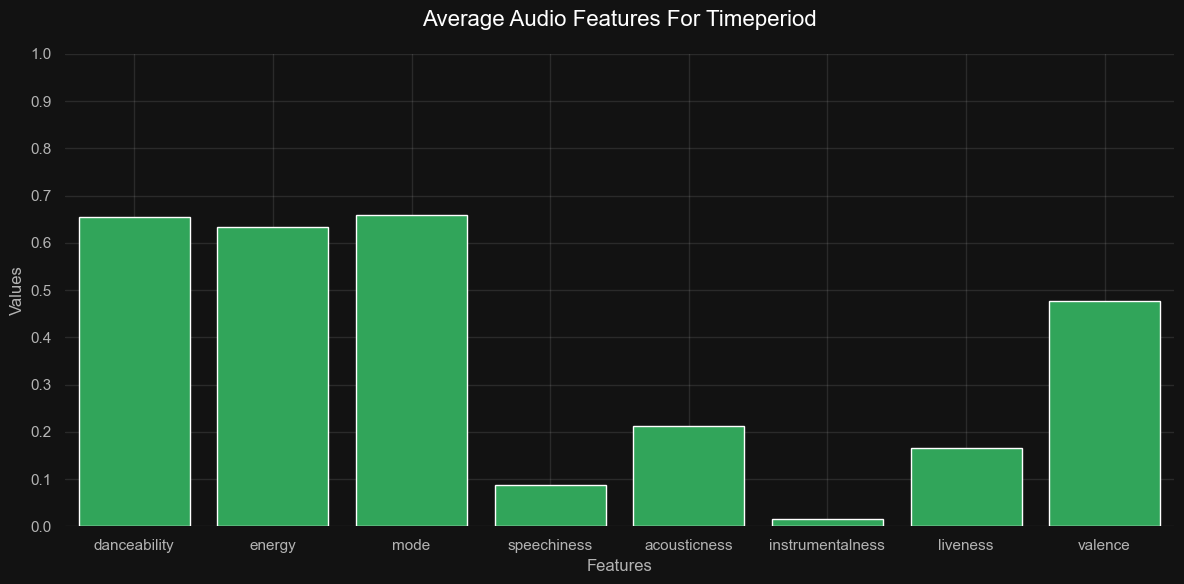

['The average beat per minute is: 125',
 'The average beat per bar is: 4',
 'The average decibel is: -6',
 'The precentage of songs in major is: 66',
 'The precentage of songs in minor is: 34',
 'Most songs are in key: C']

In [550]:
# geting graph and print for 2024 audio features
show_audio_features(chart_data, nummerical_data)

### Does each billboard contain 100 songs? 

In [79]:
# sorting values on chart week and list postion in acending order 
sorted_chart_positions = chart_positions.sort_values(by = ['chart_week', 'list_position'], ascending= True)

In [80]:
# making sure list postition goes from 1 to 100 per date in chart week 
sorted_chart_positions.head(100)

,chart_week,list_position,track_id
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v
...,...,...,...
10073,2000-01-01,96,0aDZf17dBo4qnBBQBZsJSI
87091,2000-01-01,97,5GDzpCJAhKjfzMEiXpYdhl
81243,2000-01-01,98,4u6U5nwYHok67BBymI9ldh
48066,2000-01-01,99,2sPXJCnKyQ1SWjc2JdFnQK


In [81]:
# counting list positions per date to verify that each billboard has 100 listings 
charts_count = sorted_chart_positions.groupby('chart_week')['list_position'].count()
charts_count

chart_week
2000-01-01    100
2000-01-08    100
2000-01-15    100
2000-01-22    100
2000-01-29    100
             ... 
2024-09-14    100
2024-09-21    100
2024-09-28    100
2024-10-05    100
2024-10-12    100
Name: list_position, Length: 1294, dtype: Int64

In [82]:
# counting number of dates (aka. number of charts)
charts_count.count()

1294

In [83]:
# counting number of weeks where billboard listings are not 100
charts_count[charts_count !=100].count()

86

In [84]:
# filtering on dates where listing count is not 100 and counting the frequency of each listing number
filtered_charts = charts_count[charts_count !=100]
filtered_charts.value_counts()

list_position
99    77
98     9
Name: count, dtype: Int64

### How long does a hit song maintain its position on the billboards?

In [85]:
sorted_chart_positions.groupby('chart_week')['track_id'].count()

chart_week
2000-01-01    100
2000-01-08    100
2000-01-15    100
2000-01-22    100
2000-01-29    100
             ... 
2024-09-14    100
2024-09-21    100
2024-09-28    100
2024-10-05    100
2024-10-12    100
Name: track_id, Length: 1294, dtype: int64

In [86]:
number_of_hits = sorted_chart_positions['track_id'].value_counts()

In [87]:
number_of_hits.mean()

11.991560790132617

In [88]:
sorted_chart_positions

,chart_week,list_position,track_id
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v
...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB


### What is the overal "musical fingerprint" of a hit song? 

In [93]:
# listing tables 
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


In [109]:
tracks[tracks['track_id'] == '000TJlEJQ3nafsm1hBWpoj']

,track_id,name,duration_ms,release_date,album_type,explicit
10211,000TJlEJQ3nafsm1hBWpoj,LEMONHEAD (feat. 42 Dugg),130979,2023-03-31,album,True


In [95]:
chart_positions

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H
...,...,...,...
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o


In [115]:
# merging on chart_positions with tracks on 'track_id'
tracks_with_audio_features_merge = pd.merge(chart_positions, audio_features, on='track_id', how= 'left')
tracks_with_audio_features_merge

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,0.620,0.586,1.0,-6.612,1.0,0.2120,0.155000,0.000000,0.5350,0.487,137.131,4.0
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H,0.553,0.717,7.0,-5.857,1.0,0.0318,0.000065,0.128000,0.0385,0.318,127.947,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o,0.443,0.885,7.0,-6.172,1.0,0.0414,0.123000,0.000031,0.2800,0.536,185.034,4.0


In [229]:
# sorting values on chart week and list postion in acending order 
tracks_with_audio_features = tracks_with_audio_features_merge.sort_values(['chart_week', 'list_position'], ascending= True)
# inspecting result
tracks_with_audio_features

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.5050,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.6010,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.5940,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.3560,121.966,4.0


In [ ]:
# calculating "musical fingerpint" for hit songs
# "musical fingerpint" = the mean of danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence	tempo, time_signature)
tracks_with_audio_features

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
26220,2000-01-01,1,1Yp6SnaxRGguBjcEFarluk,0.692,0.696,9.0,-10.309,0.0,0.0360,0.0860,0.018600,0.0551,0.8840,115.965,4.0
112007,2000-01-01,2,6mwA6YiKDjAUG8kWvRRUPh,0.660,0.347,11.0,-9.114,1.0,0.0300,0.4520,0.000000,0.1310,0.2560,129.747,4.0
93449,2000-01-01,3,5gZEhPrN1VLqTG1nIAXeNK,0.590,0.666,4.0,-4.047,0.0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4.0
27156,2000-01-01,4,1ckU1EhAO0Nr73QYw24SWJ,0.770,0.475,7.0,-9.512,1.0,0.1590,0.0561,0.000005,0.0607,0.4730,82.511,4.0
112335,2000-01-01,5,6nozDLxeL0TE4MS9GqYU1v,0.610,0.497,9.0,-9.880,1.0,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.5050,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.6010,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.5940,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.3560,121.966,4.0


In [384]:
# takes DataFrame as argument
# performs aggregations and returns two DataFrames for visualization
def return_musical_fingerprint(dataframe):
    
    # aggregating values for barchart 
    chart_dict = {
        # get value for audio features (value range from 0-1)
        'danceability': dataframe['danceability'].mean(),
        'energy': dataframe['energy'].mean(),
        'mode': dataframe['mode'].mean(),
        'speechiness': dataframe['speechiness'].mean(),
        'acousticness': dataframe['acousticness'].mean(),
        'instrumentalness': dataframe['instrumentalness'].mean(),
        'liveness': dataframe['liveness'].mean(),
        'valence': dataframe['valence'].mean(),
    }
    
    # find the most frequent musical key in the dataset
    # keys are represented as integers 0-11 corresponding to musical notes
    most_frequent_key = int(round(dataframe['key'].mode()))
    
    # map numerical key value to musical notation
    # reference: 0=C, 1=C#/Db, 2=D, etc.
    if most_frequent_key == 0: 
        key = 'C'
    elif most_frequent_key == 1:
        key = 'C#/Db'
    elif most_frequent_key == 2: 
        key = 'D'
    elif most_frequent_key == 3: 
        key = 'D#/Eb'
    elif most_frequent_key == 4:
        key = 'E'
    elif most_frequent_key == 5:
        key = 'F'
    elif most_frequent_key == 6:
        key = 'F#/Gb'
    elif most_frequent_key == 7:
        key = 'G#/Ab'
    elif most_frequent_key == 8:
        key = 'G#/Ab'
    elif most_frequent_key == 9:
        key = 'A'
    elif most_frequent_key == 10:
        key = 'A#/Bb'
    else: 
        key = 'B'
        
    # aggregating values for numerical presentation 
    nummerical_dict = {
        # get average beats per minute 
        'average_bpn': round(dataframe['tempo'].mean()),
        # get average beats per bar 
        'average_beats_per_bar': round(dataframe['time_signature'].mean()),
        # get precentage of songs in major and minor 
        'percentage_of_major': round((dataframe['mode'] == 1).mean() * 100),
        'percentage_of_minor': round((dataframe['mode'] == 0).mean() * 100),
        # get most requent key 
        'most_requent_key': key,
        # get average decibel 
        'average_decibels': round(dataframe['loudness'].mean())
    }
    
    # create DataFrame with single column
    chart_df = pd.DataFrame.from_dict(chart_dict, orient='index', columns=['average_value'])
    # reset index to convert it to column
    chart_df = chart_df.reset_index()
    # rename columns
    chart_df.columns = ['musical_features', 'average_value']
    
    # create DataFrame with single column
    nummerical_df = pd.DataFrame.from_dict(nummerical_dict, orient='index', columns=['average_value'])
    # reset index to convert it to column
    nummerical_df = nummerical_df.reset_index()
    # rename columns
    nummerical_df.columns = ['musical_features', 'average_value']

    return chart_df, nummerical_df
    

In [385]:
chart_data, numerical_data = return_musical_fingerprint(tracks_with_audio_features) 

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_2890/2639630472.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  most_frequent_key = int(round(dataframe['key'].mode()))


<Axes: xlabel='musical_features', ylabel='average_value'>

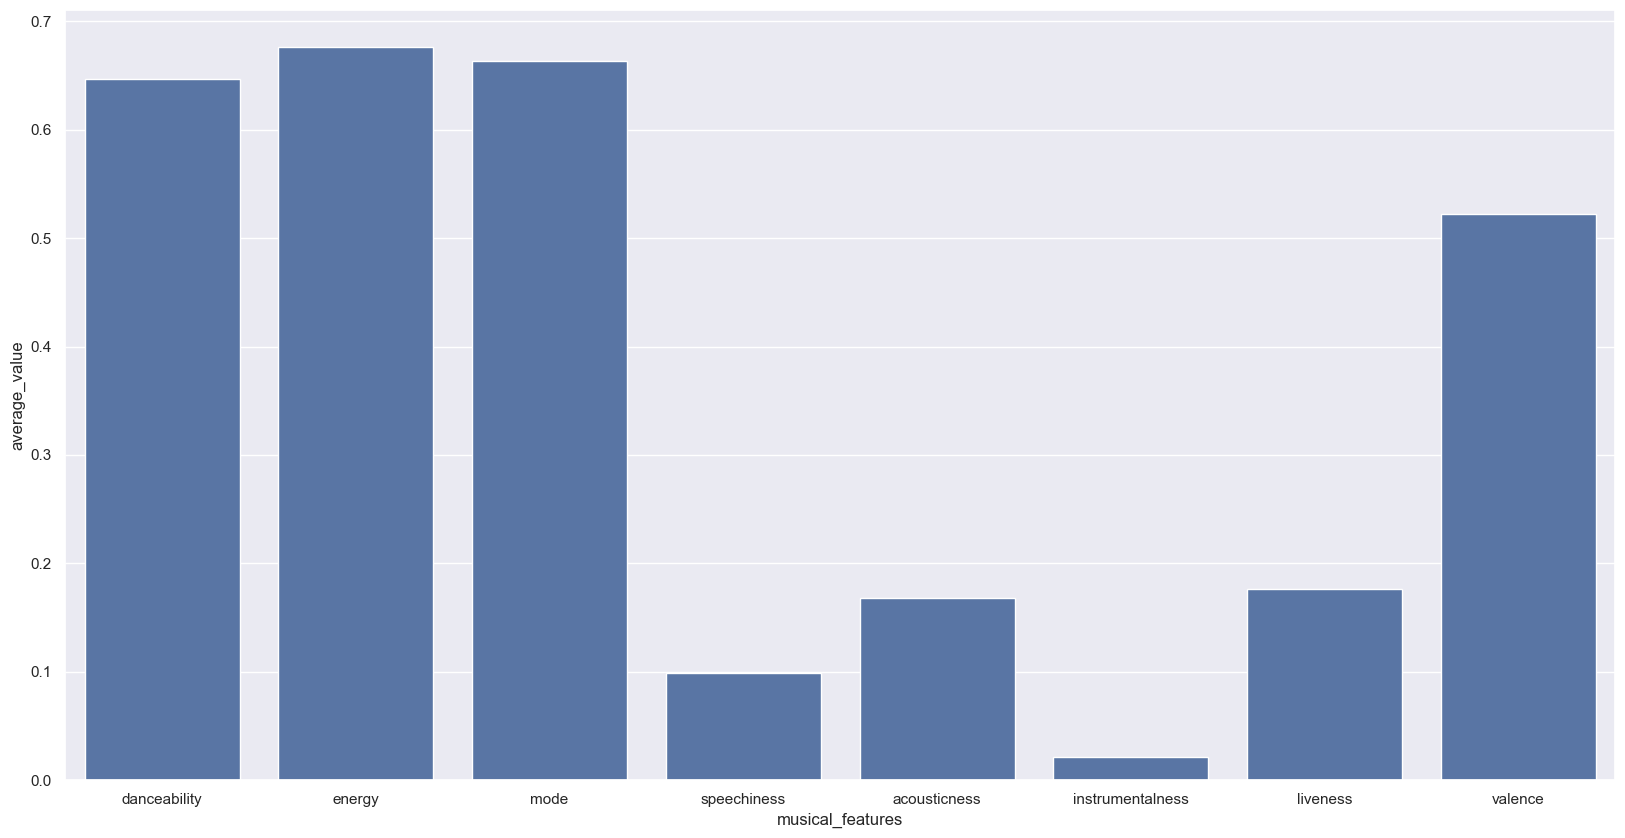

In [386]:
sns.barplot(data = chart_data, x= 'musical_features', y= 'average_value')

In [387]:
numerical_data.iloc[0,1]

122

In [388]:
bpn = numerical_data.iloc[0,1]
bppb = numerical_data.iloc[1,1]
major = numerical_data.iloc[2,1]
minor = numerical_data.iloc[3,1]
key = numerical_data.iloc[4,1]
db = numerical_data.iloc[5,1]

print(f'The average beat per minute is: {bpn}')
print(f'The average beat per bar is: {bppb}')
print(f'The average decibel is: {db}')
print(f'The precentage of songs in major is: {major}')
print(f'The precentage of songs in minor is: {minor}')
print(f'Most songs are in key: {key}')

The average beat per minute is: 122
The average beat per bar is: 4
The average decibel is: -6
The precentage of songs in major is: 66
The precentage of songs in minor is: 34
Most songs are in key: C#/Db


### How has the "musical fingerprint" changed over the years? 

In [390]:
tracks_with_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129305 entries, 26220 to 9457
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   chart_week        129305 non-null  datetime64[ns]
 1   list_position     129305 non-null  Int64         
 2   track_id          129305 non-null  object        
 3   danceability      129269 non-null  float64       
 4   energy            129269 non-null  float64       
 5   key               129269 non-null  float64       
 6   loudness          129269 non-null  float64       
 7   mode              129269 non-null  float64       
 8   speechiness       129269 non-null  float64       
 9   acousticness      129269 non-null  float64       
 10  instrumentalness  129269 non-null  float64       
 11  liveness          129269 non-null  float64       
 12  valence           129269 non-null  float64       
 13  tempo             129269 non-null  float64       
 14  time_si

In [401]:
# testing function
testing_date_filter = filter_on_year(tracks_with_audio_features, 2020)
testing_date_filter

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
10433,2020-01-04,1,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.164000,0.00000,0.0708,0.350,150.273,4.0
37795,2020-01-04,2,2EjXfH91m7f8HiJN1yQg97,0.598,0.470,8.0,-8.744,1.0,0.0496,0.617000,0.00000,0.5050,0.879,67.086,4.0
127696,2020-01-04,3,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.643000,0.00000,0.0652,0.806,119.705,4.0
117579,2020-01-04,4,77khP2fIVhSW23NwxrRluh,0.682,0.375,0.0,-13.056,1.0,0.0303,0.579000,0.00000,0.0760,0.888,140.453,4.0
34053,2020-01-04,5,21jGcNKet2qwijlDFuPiPb,0.695,0.763,0.0,-3.497,1.0,0.0396,0.189000,0.00242,0.0863,0.551,120.042,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41047,2020-12-26,96,2S8UMuLJ0z8agFgFGJ6Ztt,0.802,0.590,5.0,-7.189,1.0,0.0493,0.087400,0.00000,0.2750,0.687,138.084,4.0
50314,2020-12-26,97,31iqpzg1ZXLLgq0L5iIwLe,0.900,0.521,4.0,-7.286,0.0,0.1470,0.013500,0.00000,0.0951,0.213,132.007,4.0
109832,2020-12-26,98,6eVxH9Kyanzrw636zJRPcw,0.887,0.606,2.0,-6.572,1.0,0.3240,0.000407,0.00000,0.1510,0.272,139.995,4.0
43416,2020-12-26,99,2aq7ZO1is1czoQAh076QFU,0.497,0.897,5.0,-4.210,1.0,0.0513,0.006350,0.00000,0.3050,0.539,142.007,4.0


In [402]:
# testing function
testing_date_filter = filter_on_year(tracks_with_audio_features, 2024)
testing_date_filter

,chart_week,list_position,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
37786,2024-01-06,1,2EjXfH91m7f8HiJN1yQg97,0.598,0.470,8.0,-8.744,1.0,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4.0
10440,2024-01-06,2,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4.0
127695,2024-01-06,3,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4.0
38034,2024-01-06,4,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2.0,-12.472,1.0,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4.0
117586,2024-01-06,5,77khP2fIVhSW23NwxrRluh,0.682,0.375,0.0,-13.056,1.0,0.0303,0.5790,0.000000,0.0760,0.888,140.453,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2024-10-12,96,2yR2sziCF4WEs3klW1F38d,0.476,0.829,10.0,-3.806,0.0,0.0658,0.0172,0.009160,0.1670,0.505,139.198,4.0
91886,2024-10-12,97,5ahdQDl9WGN9dNDDH0RKyJ,0.406,0.619,1.0,-6.762,1.0,0.0958,0.2550,0.000001,0.3990,0.601,83.530,4.0
9466,2024-10-12,98,0XuEfX2tOQPxhJCIMcjkgD,0.514,0.778,1.0,-4.678,1.0,0.0320,0.3640,0.000000,0.1080,0.594,156.034,4.0
43711,2024-10-12,99,2bl81llf715VEEbAx03yvB,0.590,0.727,6.0,-7.955,1.0,0.0706,0.0259,0.000065,0.0827,0.356,121.966,4.0


In [403]:
chart_data_test, numerical_data_test = return_musical_fingerprint(testing_date_filter) 

/var/folders/dz/cpbtp_bj5clg61h2kc3jgjpc0000gn/T/ipykernel_2890/2639630472.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  most_frequent_key = int(round(dataframe['key'].mode()))


The average beat per minute is: 125
The average beat per bar is: 4
The average decibel is: -6
The precentage of songs in major is: 66
The precentage of songs in minor is: 34
Most songs are in key: C


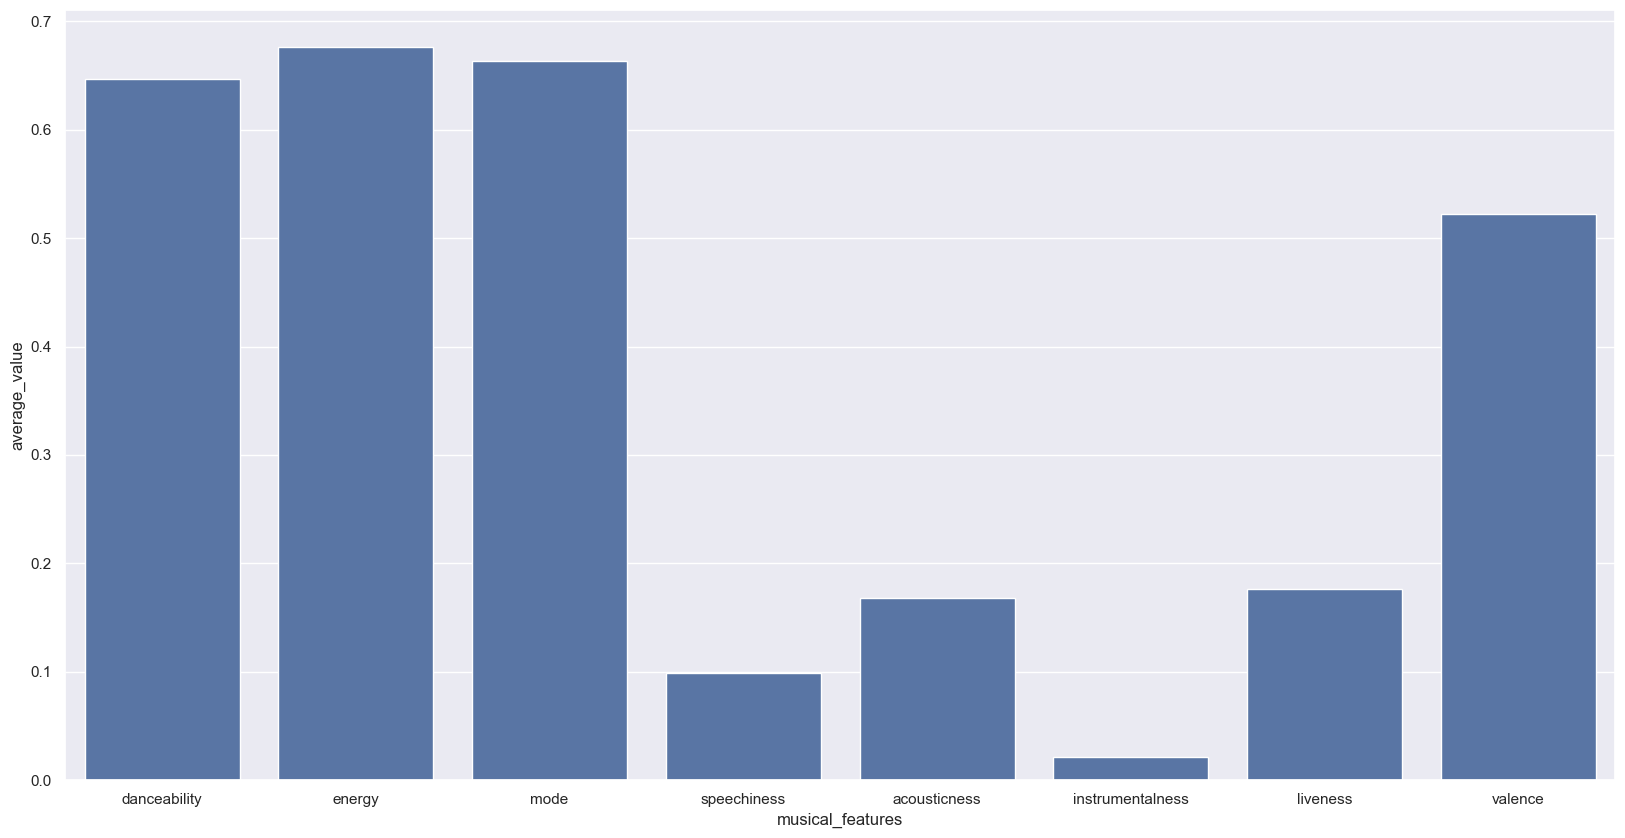

In [406]:
sns.barplot(data = chart_data, x= 'musical_features', y= 'average_value')

bpn = numerical_data_test.iloc[0,1]
bppb = numerical_data_test.iloc[1,1]
major = numerical_data_test.iloc[2,1]
minor = numerical_data_test.iloc[3,1]
key = numerical_data_test.iloc[4,1]
db = numerical_data_test.iloc[5,1]

print(f'The average beat per minute is: {bpn}')
print(f'The average beat per bar is: {bppb}')
print(f'The average decibel is: {db}')
print(f'The precentage of songs in major is: {major}')
print(f'The precentage of songs in minor is: {minor}')
print(f'Most songs are in key: {key}')

In [470]:
# takes two DataFrames as arguments, returns barplot (Spotify-inspired) and list of audio features
def show_audio_features(chart_dataframe, print_dataframe):

    # set Spotify-like style
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))

    # create barplot
    sns.barplot(data=chart_data, 
            x='musical_features', 
            y='average_value',
            color='#1DB954')  # Spotify green
    
   # set y-axis limits without numpy
    plt.ylim(0, 1.0)
    # Create tick range without numpy
    ticks = [x/10 for x in range(0, 11)]
    plt.yticks(ticks)

    # customing colors
    plt.gcf().set_facecolor('#121212')  # Spotify dark background
    plt.gca().set_facecolor('#121212') # Spotify dark background

    # Style grid and spines
    plt.grid(True, alpha=0.1)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # customize text
    plt.title('Average Audio Features For Timeperiod', color='white', fontsize=16, pad=20)
    plt.xlabel('Features', color='#B3B3B3', fontsize=12)
    plt.ylabel('Values', color='#B3B3B3', fontsize=12)

    # Adjust tick colors
    plt.tick_params(colors='#B3B3B3')

    plt.tight_layout()
    plt.show()

    # get values from numerical data
    bpn = print_dataframe.iloc[0,1]
    bppb = print_dataframe.iloc[1,1]
    major = print_dataframe.iloc[2,1]
    minor = print_dataframe.iloc[3,1]
    key = print_dataframe.iloc[4,1]
    db = print_dataframe.iloc[5,1]
    
    # return list with numerical values
    return [
    f'The average beat per minute is: {bpn}',
    f'The average beat per bar is: {bppb}',
    f'The average decibel is: {db}',
    f'The precentage of songs in major is: {major}',
    f'The precentage of songs in minor is: {minor}',
    f'Most songs are in key: {key}'
    ]

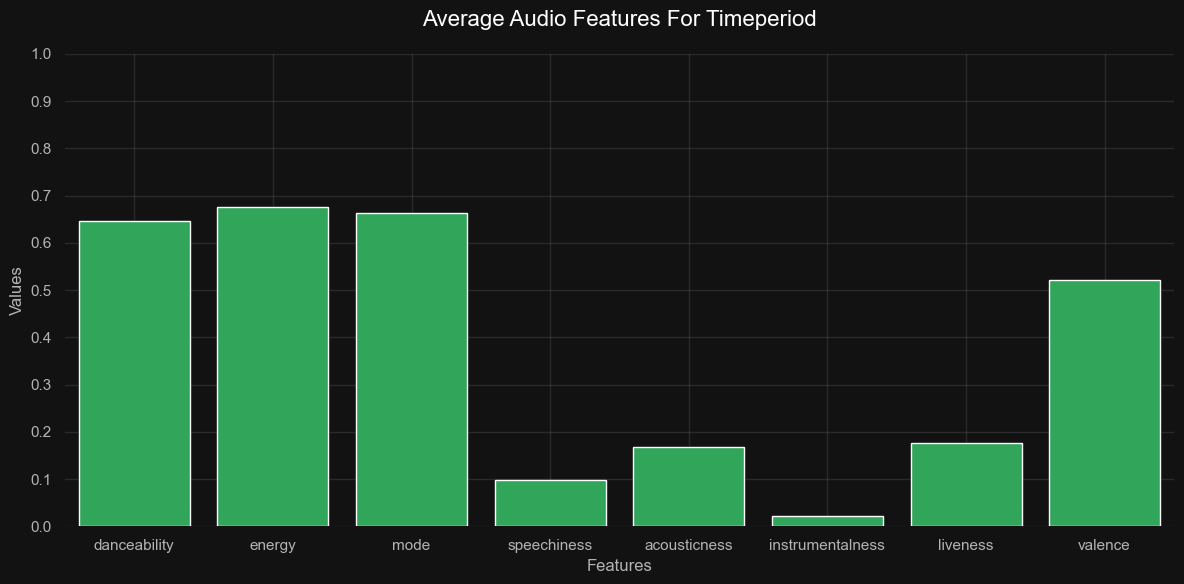

['The average beat per minute is: 125',
 'The average beat per bar is: 4',
 'The average decibel is: -6',
 'The precentage of songs in major is: 66',
 'The precentage of songs in minor is: 34',
 'Most songs are in key: C']

In [471]:
show_audio_features(chart_data_test, numerical_data_test)